In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/My Drive/IMDB_Dataset/IMDB_Dataset.csv')
data['review'][0:6]

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
Name: review, dtype: object

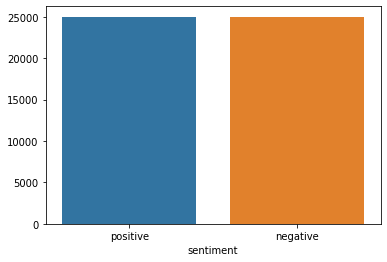

In [4]:
pos,neg = data.groupby(['sentiment']).sentiment.count()
sns.barplot(x = 'sentiment', y=neg, data = data )
plt.show()
#Hence there are 25000 positive ans negative reviews

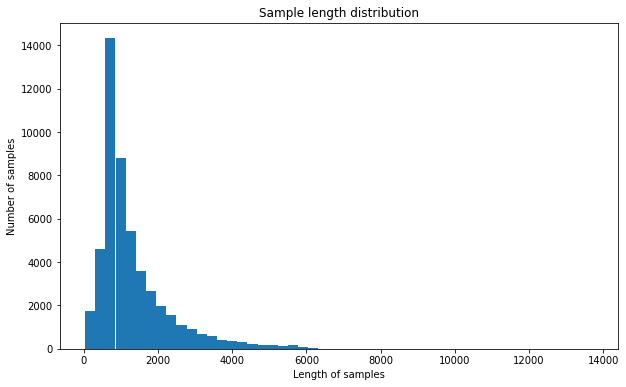

In [5]:
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['review'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()


In [0]:
data['review'] = data['review'].str.lower()

In [0]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

i =0
for strn in data['review']:
  data['review'][i] = remove_html_tags(strn)
  i +=1

In [0]:

data['review'] = data['review'].apply(lambda x : re.sub(r"[^a-zA-Z0-9]", " ", x ))

Text(0.5, 0, 'words')

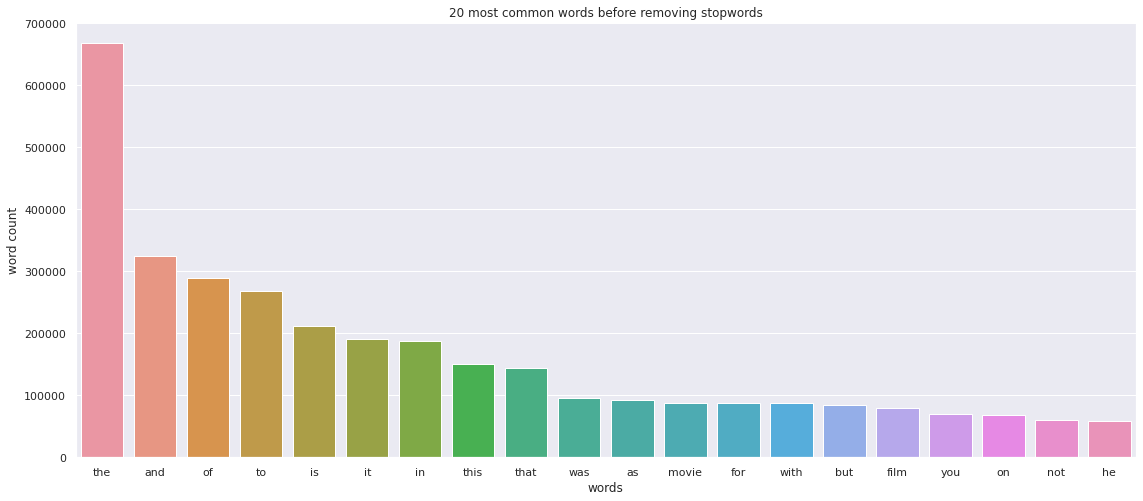

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['review'], 20)

df1 = pd.DataFrame(common_words, columns = ['review' , 'count'])

sns.set(rc={'figure.figsize':(19,8)})

plot = sns.barplot(x = 'review', y = 'count', data = df1)
plot.set_title('20 most common words before removing stopwords')
plot.set_ylabel('word count')
plot.set_xlabel('words')



In [0]:
# Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

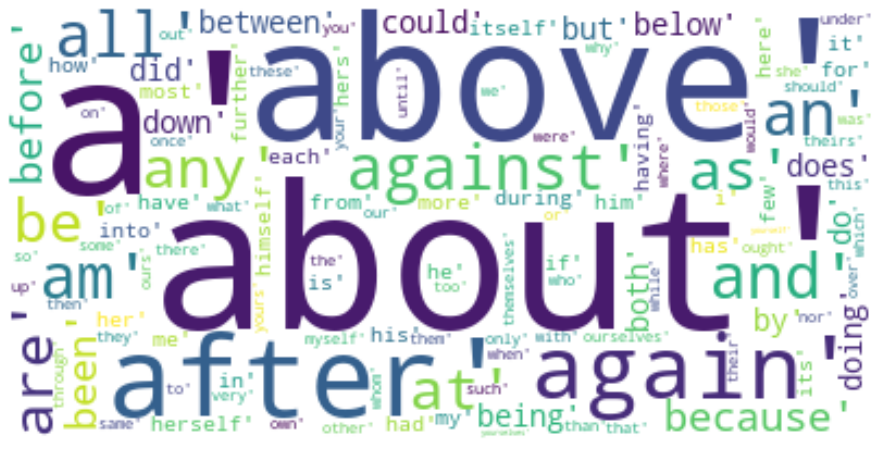

In [11]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = str(stopwords)


wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
i = 0
for strn in data['review']:
  for word in stopwords:
    token = " " + word + " "
    strn = strn.replace(token, " ")
    strn = strn.replace("  ", " ")                  #remove stopwords from the review
  data['review'][i] = strn
  i += 1



Text(0.5, 0, 'words')

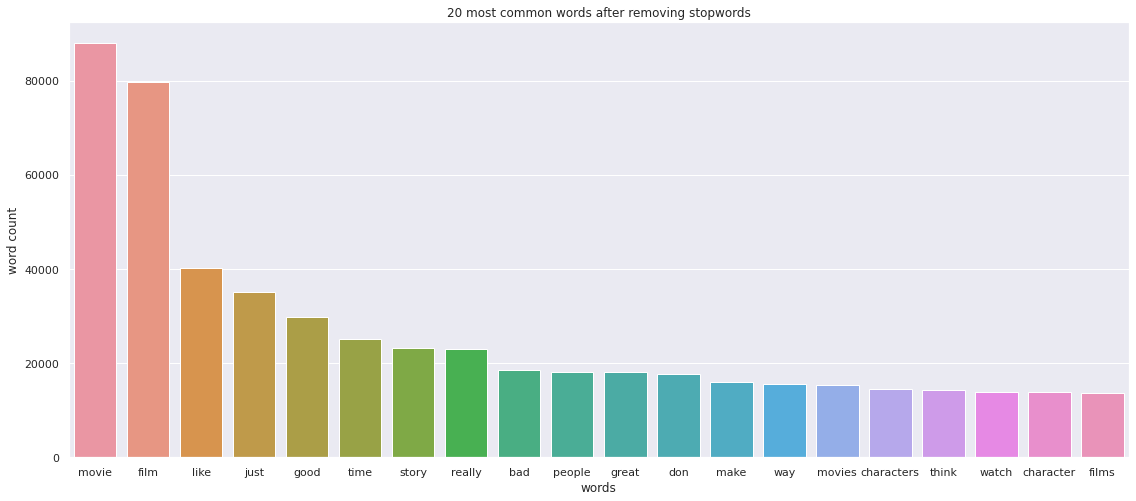

In [13]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['review'], 20)

df2 = pd.DataFrame(common_words, columns = ['review' , 'count'])

sns.set(rc={'figure.figsize':(19,8)})

plot = sns.barplot(x = 'review', y = 'count', data = df2)
plot.set_title('20 most common words after removing stopwords')
plot.set_ylabel('word count')
plot.set_xlabel('words')

In [14]:
data['review'][0]

'one reviewers mentioned watching just 1 oz episode ll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust not show faint hearted timid show pulls no punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy not high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away say main appeal show due fact goes shows wouldn t dare forget pretty pictures painted mainstream audiences forget charm forget romance oz doesn t mess around first episode ever saw struck nasty surreal couldn t say ready watched developed taste oz got accustomed high levels graphic violence not just violence injustice crooked guards ll sold nickel inmates ll kill order get away well mannered middle c

In [15]:
x = data['review'].iloc[0:45000 , ]
y = data['sentiment'].iloc[0:45000 , ]
x_test = data['review'].iloc[45000 : , ]
y_test = data['sentiment'].iloc[45000 : , ]

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x,y, test_size = (0.2))



print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(36000,)
(36000,)
(9000,)
(9000,)
(5000,)
(5000,)


In [16]:
#Create tokens of unique words present in x_train

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = (len(word_index)) +1





Using TensorFlow backend.


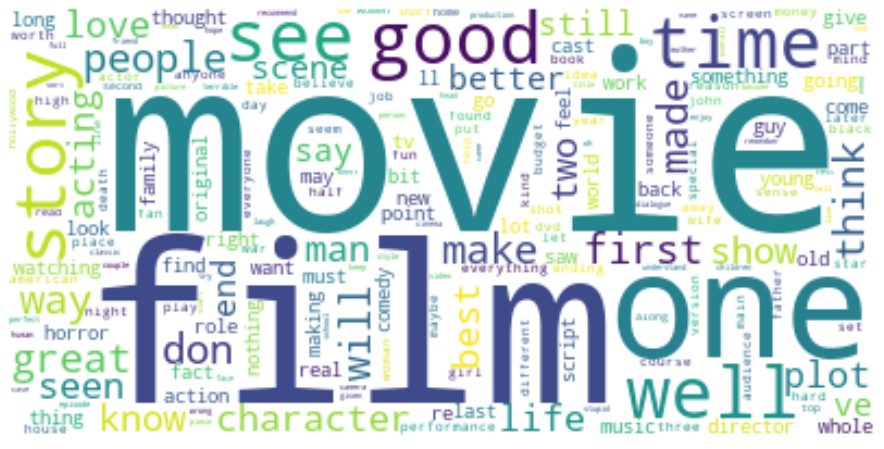

In [17]:
vocab_list = (str(word_index.keys()))
vocab = vocab_list.replace(", ",'')
vocab = vocab.replace("''",' ')
vocab = vocab.replace("dict_keys(['<OOV> s",'')
vocab

wordcloud = WordCloud(background_color="white").generate(vocab)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#Convert sentences to sequences
from keras.preprocessing.sequence import pad_sequences

x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_train_padded = pad_sequences(x_train_sequences, padding='post',maxlen=1496)
x_val_sequences = tokenizer.texts_to_sequences(x_val)
x_val_padded = pad_sequences(x_val_sequences, padding='post',maxlen=1496)
x_test_sequences = tokenizer.texts_to_sequences(x_test)
x_test_padded = pad_sequences(x_test_sequences, padding='post',maxlen=1496)

print((x_train_padded).shape)
print((x_val_padded).shape)
print((x_test_padded).shape)

(36000, 1496)
(9000, 1496)
(5000, 1496)


In [19]:

from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_y_train = y_train.copy()
label_y_val   = y_val.copy()
label_y_test  = y_test.copy()

label_encoder = LabelEncoder()

label_y_train = label_encoder.fit_transform(label_y_train)
label_y_val   = label_encoder.transform(label_y_val)
label_y_test  = label_encoder.transform(label_y_test)


label_y_train = label_y_train.reshape(36000,1)
label_y_val   = label_y_val.reshape(9000,1)
label_y_test  = label_y_test.reshape(5000,1)

# positive is encoded as -> 1
# negative is encoded as -> 0

print(label_y_train.shape)
print(label_y_val.shape)
print(label_y_test.shape)


(36000, 1)
(9000, 1)
(5000, 1)


In [20]:
#creating model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 55, input_length=1496),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(55,return_sequences =True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(55)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1496, 55)          4967930   
_________________________________________________________________
bidirectional (Bidirectional (None, 1496, 110)         48840     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 110)               73040     
_________________________________________________________________
dense (Dense)                (None, 64)                7104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 5,096,979
Trainable params: 5,096,979
Non-trainable params: 0
_________________________________________________________________


In [56]:
num_epochs = 5
history = model.fit(x_train_padded, label_y_train, epochs=num_epochs, validation_data=(x_val_padded, label_y_val), verbose=2)

Epoch 1/5
1125/1125 - 309s - loss: 0.2065 - acc: 0.9231 - val_loss: 0.3273 - val_acc: 0.8599
Epoch 2/5
1125/1125 - 307s - loss: 0.1248 - acc: 0.9576 - val_loss: 0.3440 - val_acc: 0.8852
Epoch 3/5
1125/1125 - 305s - loss: 0.0620 - acc: 0.9812 - val_loss: 0.3467 - val_acc: 0.8893
Epoch 4/5
1125/1125 - 305s - loss: 0.0381 - acc: 0.9885 - val_loss: 0.4521 - val_acc: 0.8831
Epoch 5/5
1125/1125 - 306s - loss: 0.0250 - acc: 0.9928 - val_loss: 0.4343 - val_acc: 0.8843


In [57]:
print(x_test_padded.shape)
print(label_y_test.shape)

(5000, 1496)
(5000, 1)


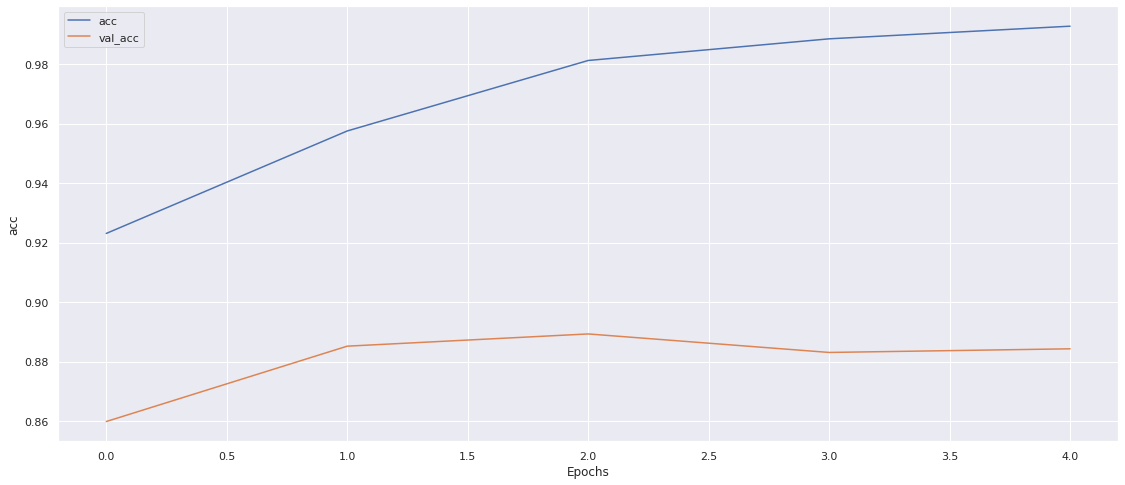

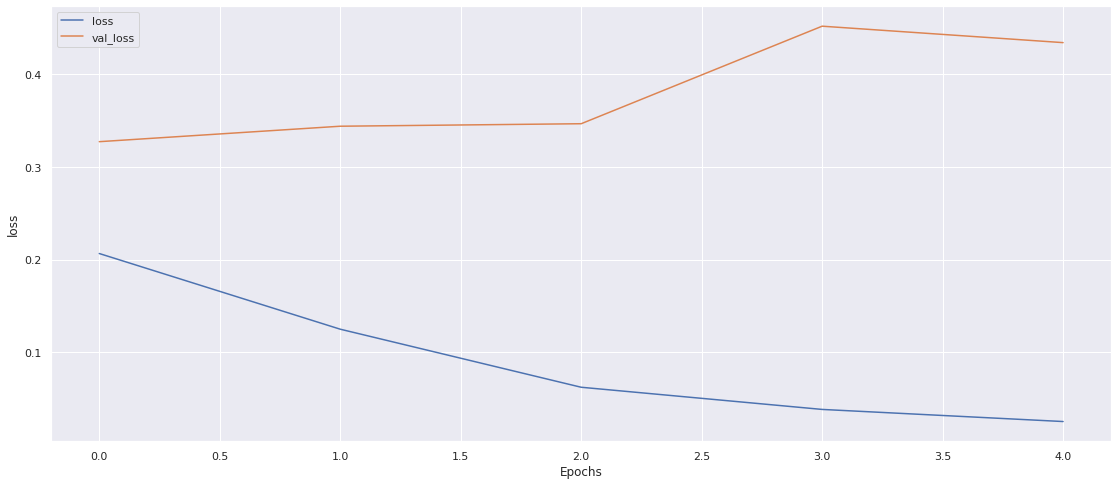

In [58]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [59]:
pred = model.predict(x_test_padded)

for i in range(len(pred)):
  if pred[i] > 0.5:
    pred[i] = 1
  else :
    pred[i] = 0

pred


array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [60]:
model.evaluate(x_test_padded,label_y_test)

157/157 [==============================] - 15s 98ms/step - loss: 0.3982 - acc: 0.8912


[0.398207426071167, 0.8912000060081482]

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()     
drive = GoogleDrive(gauth)

In [0]:
model.save('model.h5')
model_file = drive.CreateFile({'Movie_review' : 'model.h5'})      
model_file.SetContentFile('model.h5')    
model_file.Upload()

In [64]:

from sklearn.metrics import classification_report


print (classification_report(pred, label_y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2464
         1.0       0.90      0.88      0.89      2536

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, label_y_test)

array([[2225,  239],
       [ 305, 2231]])

In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_test_padded).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(label_y_test, y_pred_keras)

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

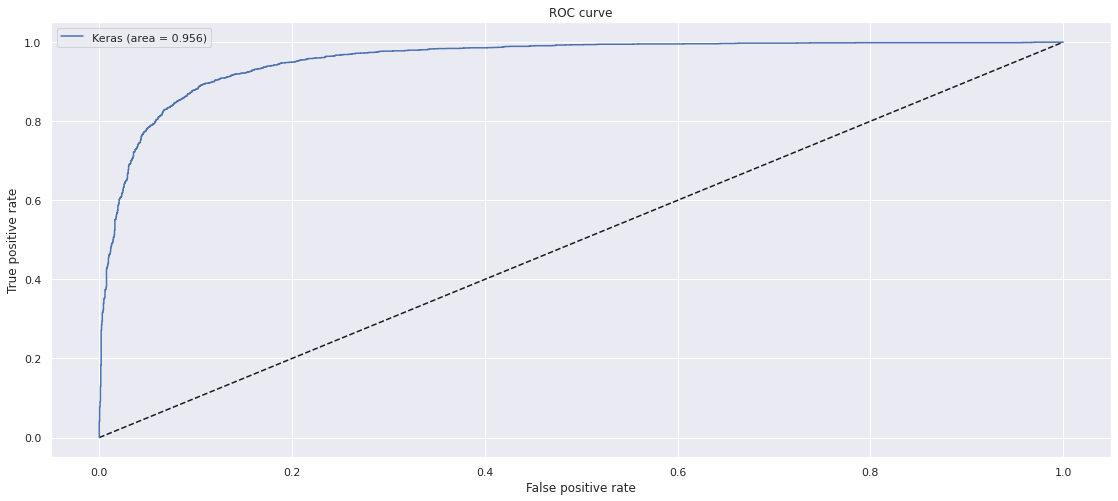

In [68]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [69]:
text = [' dude i enjoyed being stuck there', '  was complete waste of money and time']


text_sequence = tokenizer.texts_to_sequences(text)
text_padded = pad_sequences(text_sequence, padding='post',maxlen=1496)

prediction = model.predict(text_padded)

output = np.array([])

for pred in prediction:
  output =np.append(output , 'positive' if pred>0.5 else 'negative')

print(output)
  

['positive' 'negative']


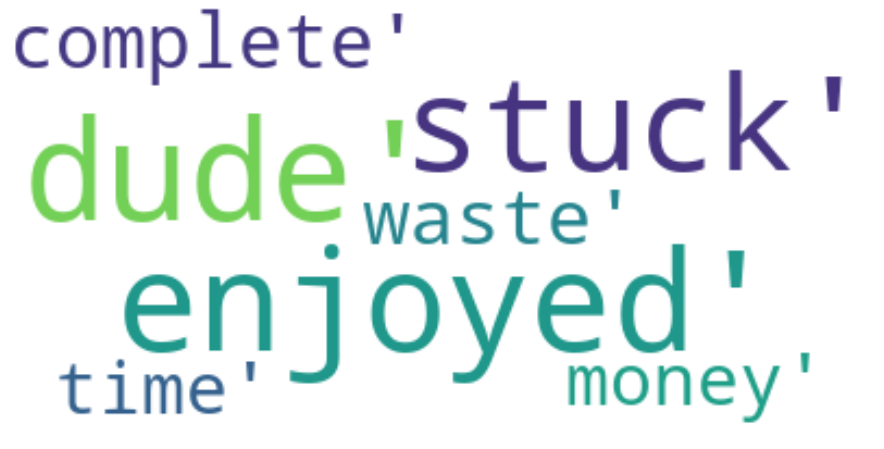

In [70]:
cloud = []

for strn in text:
  sp = strn.split()
  for word in sp:
     if word not in stopwords:
       cloud.append(word)
cloud = (str(cloud))

wordcloud = WordCloud(background_color="white").generate(cloud)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()